___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("*****************")
    

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
*****************
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
*****************
Male      5457
Female    4543
Name: Gender, dtype: int64
*****************


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [8]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# drop unnesessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
# Converting categorical values to numeric
df["geog_germany"] =  df.Geography.apply(lambda x: 1 if x == "Germany" else 0)
df["geog_spain"] =  df.Geography.apply(lambda x: 1 if x == "Spain" else 0)
df["geog_france"] =  df.Geography.apply(lambda x: 1 if x == "France" else 0)

In [12]:
df["Gender"] =  df.Gender.apply(lambda x: 1 if x == "Female" else 0)


In [13]:
df.drop("Geography", axis=1, inplace=True)

In [14]:
df.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geog_germany,geog_spain,geog_france
0,619,1,42,2,0.000,1,1,1,101348.880,1,0,0,1
1,608,1,41,1,83807.860,1,0,1,112542.580,0,0,1,0


In [15]:
# check target
df.Exited.value_counts()

# binary classification which means we should use sigmoid act function and 1 neuron in the output layer

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'geog_germany', 'geog_spain', 'geog_france'],
      dtype='object')

In [17]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,9]]
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geog_germany,geog_spain,geog_france,Exited
0,619,1,42,2,0.000,1,1,1,101348.880,0,0,1,1
1,608,1,41,1,83807.860,1,0,1,112542.580,0,1,0,0
2,502,1,42,8,159660.800,3,1,0,113931.570,0,0,1,1
3,699,1,39,1,0.000,2,0,0,93826.630,0,0,1,0
4,850,1,43,2,125510.820,1,1,1,79084.100,0,1,0,0


0    7963
1    2037
Name: Exited, dtype: int64

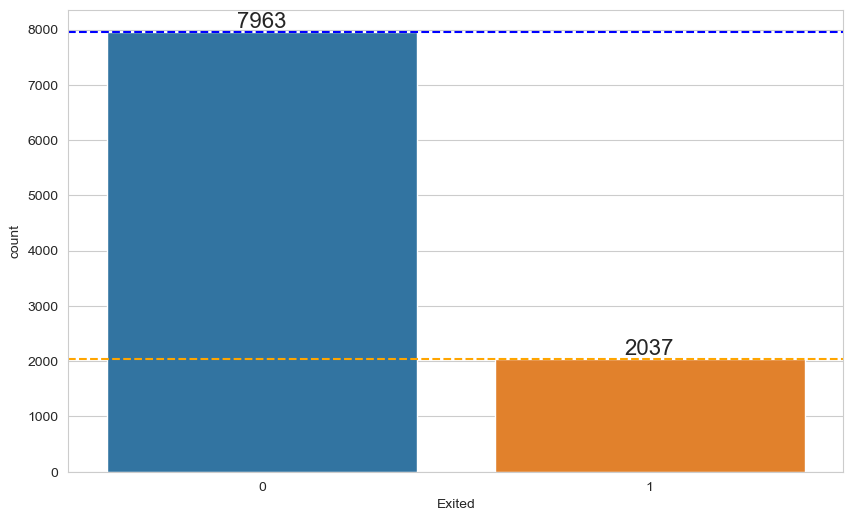

In [18]:
# check class distribution
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');
# imbalanced

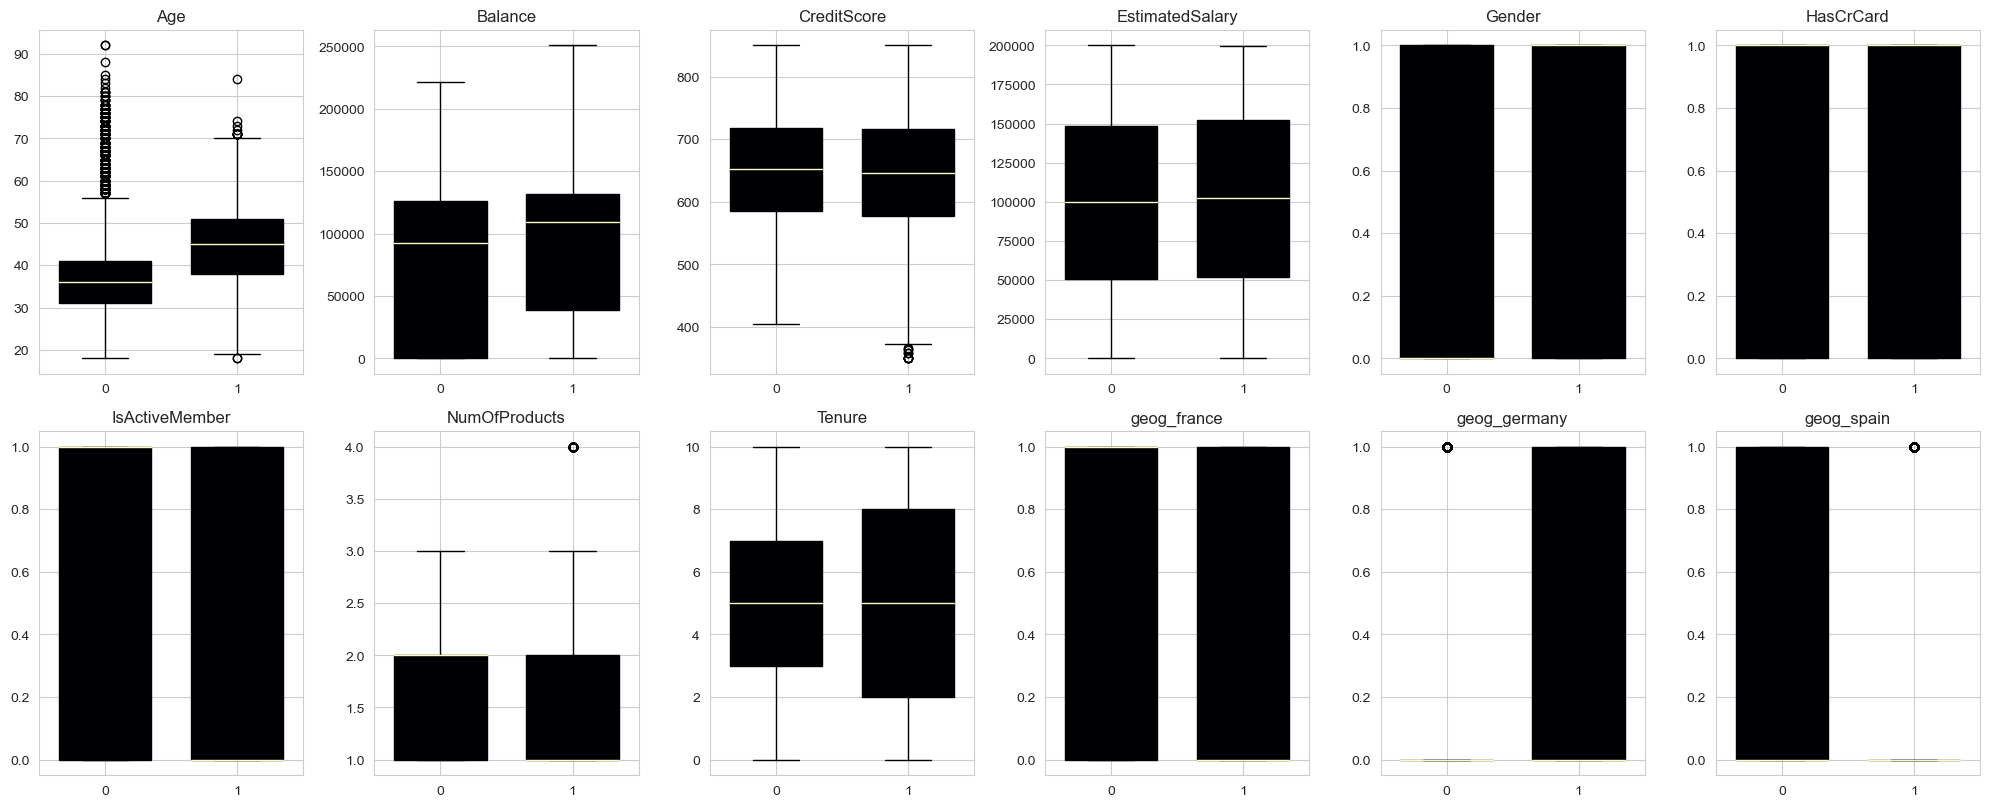

In [19]:
# check outliers with boxplots for target feature

df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

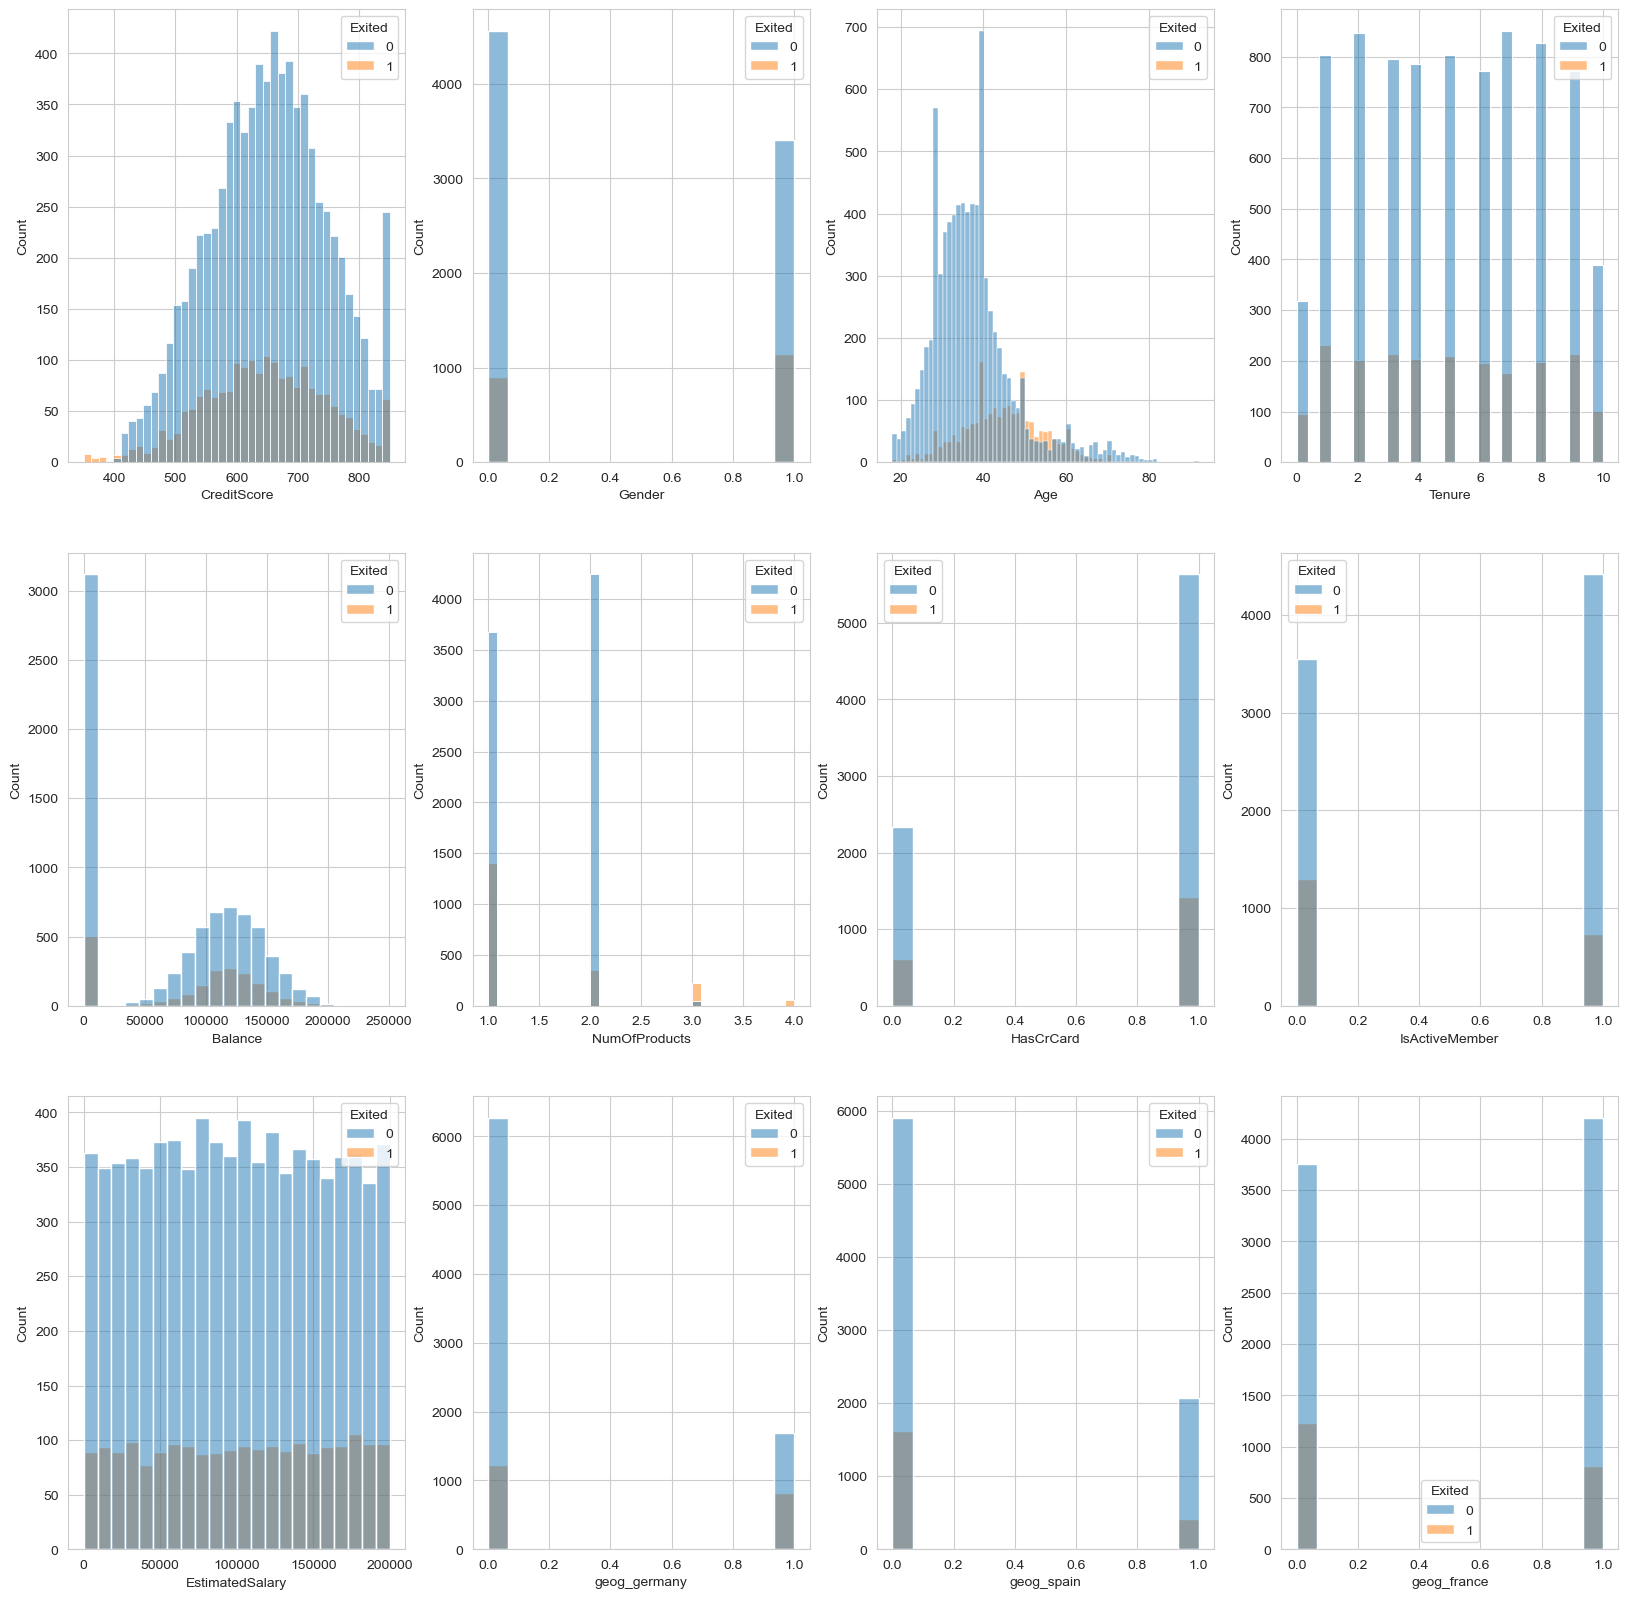

In [20]:
# check corr and heatmap - pair plot

# which features separate the classes better
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(3, 4, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

In [21]:
# corr
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geog_germany,geog_spain,geog_france,Exited
CreditScore,1.000,0.003,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,0.006,0.005,-0.009,-0.027
Gender,0.003,1.000,0.028,-0.015,-0.012,0.022,-0.006,-0.023,0.008,0.025,-0.017,-0.007,0.107
Age,-0.004,0.028,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.047,-0.002,-0.039,0.285
Tenure,0.001,-0.015,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.001,0.004,-0.003,-0.014
Balance,0.006,-0.012,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.401,-0.135,-0.231,0.119
NumOfProducts,0.012,0.022,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.010,0.009,0.001,-0.048
HasCrCard,-0.005,-0.006,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,0.011,-0.013,0.002,-0.007
IsActiveMember,0.026,-0.023,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.020,0.017,0.003,-0.156
EstimatedSalary,-0.001,0.008,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.010,-0.006,-0.003,0.012
geog_germany,0.006,0.025,0.047,-0.001,0.401,-0.010,0.011,-0.020,0.010,1.000,-0.332,-0.580,0.173


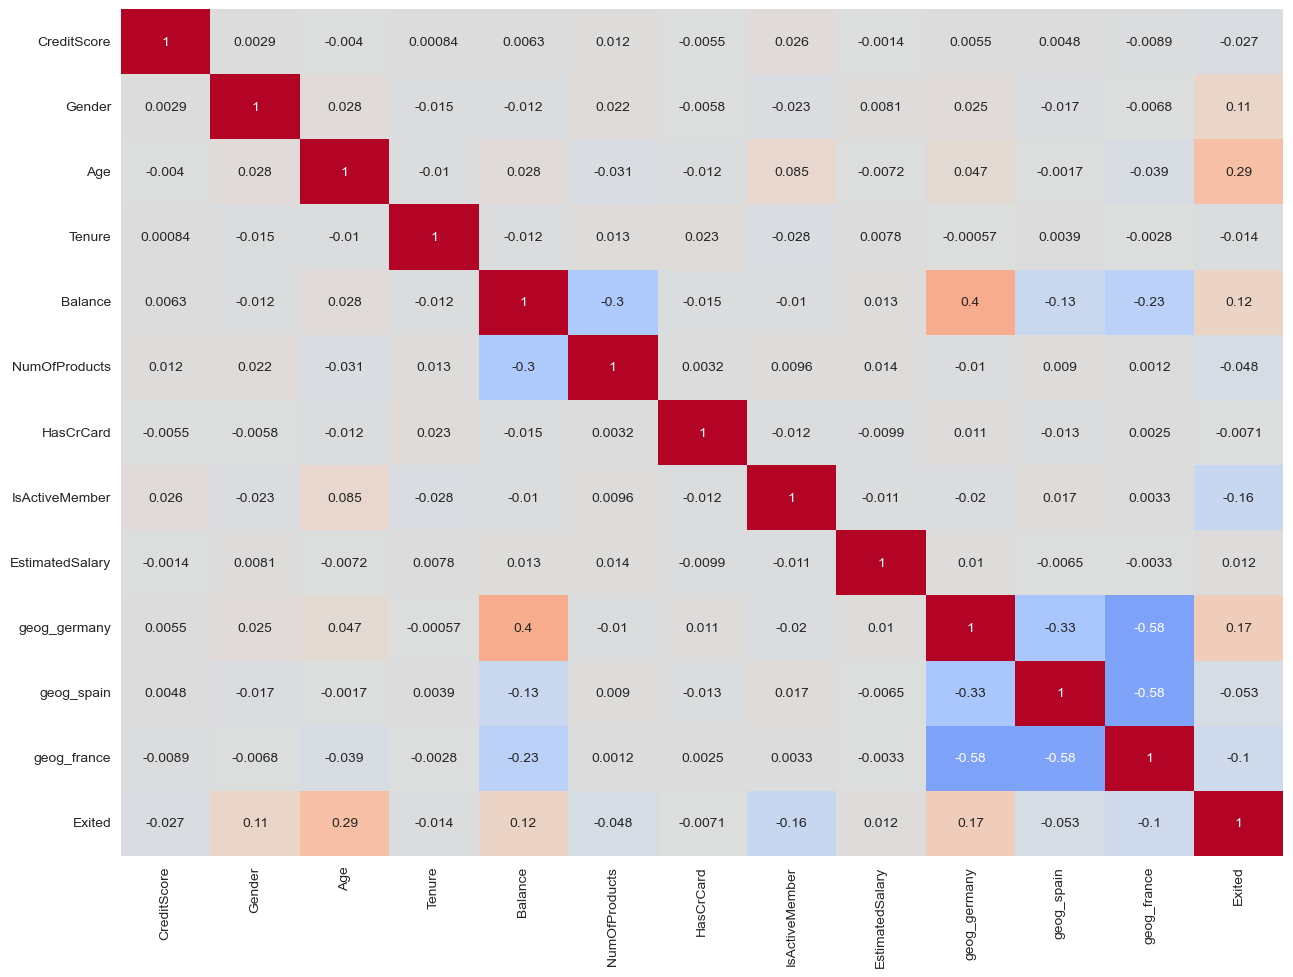

In [22]:
# heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

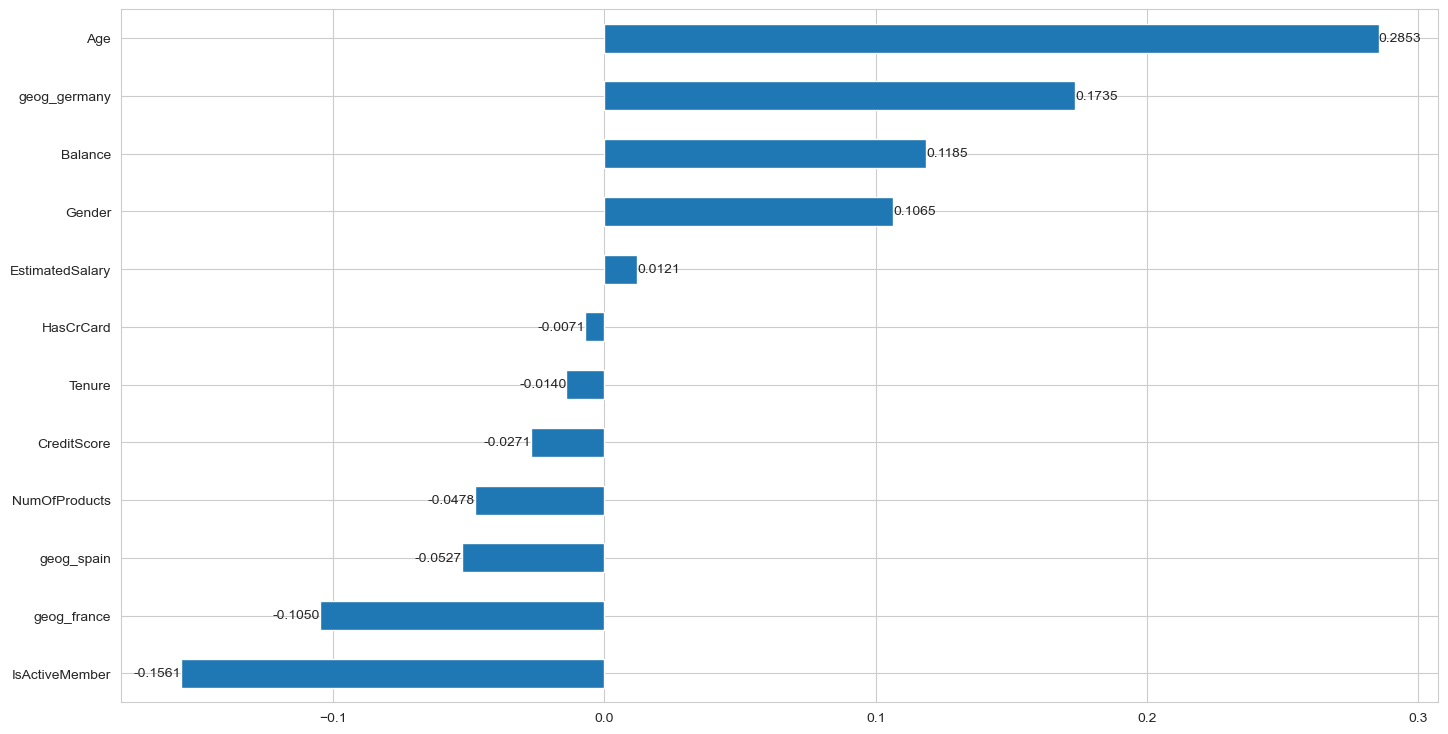

In [23]:
plt.figure(figsize=(17, 9))
ax = df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [25]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [26]:
seed = 50791

In [27]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.
# val datayi bu ustte olusturdugumuz train datasi icinden olusturacagiz
X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)


In [28]:
# create the scaler
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train) # fit&transform train data
X_val = scaler.transform(X_val) # transform val data
X_test = scaler.transform(X_test) # transform test data

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [31]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(12, 18) dtype=float32, numpy=
 array([[ 0.15185279,  0.4186973 ,  0.41358918, -0.12065384, -0.41840667,
          0.3590138 , -0.05483547, -0.4091985 ,  0.08905238, -0.01452592,
         -0.30435988, -0.42909306,  0.3126176 ,  0.17383927, -0.3350221 ,
         -0.19937404,  0.04935849,  0.1825915 ],
        [-0.03423601,  0.09814125, -0.10778111,  0.23554802, -0.24629213,
         -0.22107938,  0.41756356,  0.14156121, -0.1592013 ,  0.26533538,
         -0.12546983,  0.27020407, -0.4134418 ,  0.2933824 , -0.31980163,
          0.3058324 ,  0.40091902, -0.15400124],
        [-0.12882474, -0.01632297,  0.43968529, -0.17402929,  0.2619378 ,
          0.3114261 , -0.10816059,  0.22112888, -0.2847869 , -0.01715699,
          0.3875308 , -0.22158489,  0.20664757, -0.40433294, -0.3934626 ,
          0.07160038, -0.39556876,  0.32856685],
        [ 0.41347486, -0.04002878, -0.30656624,  0.38581723, -0.37816802,
          0.12724417,  0.18501079,  0.0077223

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), # x_val, y_val that we assigned before as validation_data
          batch_size=128, 
          epochs=50,
          verbose=1)

Epoch 1/50
64/64 [==============================] - 1s 5ms/step - loss: 0.5492 - accuracy: 0.7963 - val_loss: 0.5096 - val_accuracy: 0.7967
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7963 - val_loss: 0.4811 - val_accuracy: 0.7967
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7963 - val_loss: 0.4689 - val_accuracy: 0.7967
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7981 - val_loss: 0.4595 - val_accuracy: 0.8022
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.8043 - val_loss: 0.4515 - val_accuracy: 0.8056
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8079 - val_loss: 0.4427 - val_accuracy: 0.8067
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8107 - val_loss: 0.4352 - val_accuracy: 0.8078
Epoch 8/50
64/64 [==

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.549,0.796,0.510,0.797
1,0.495,0.796,0.481,0.797
2,0.477,0.796,0.469,0.797
3,0.468,0.798,0.460,0.802
4,0.460,0.804,0.451,0.806


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

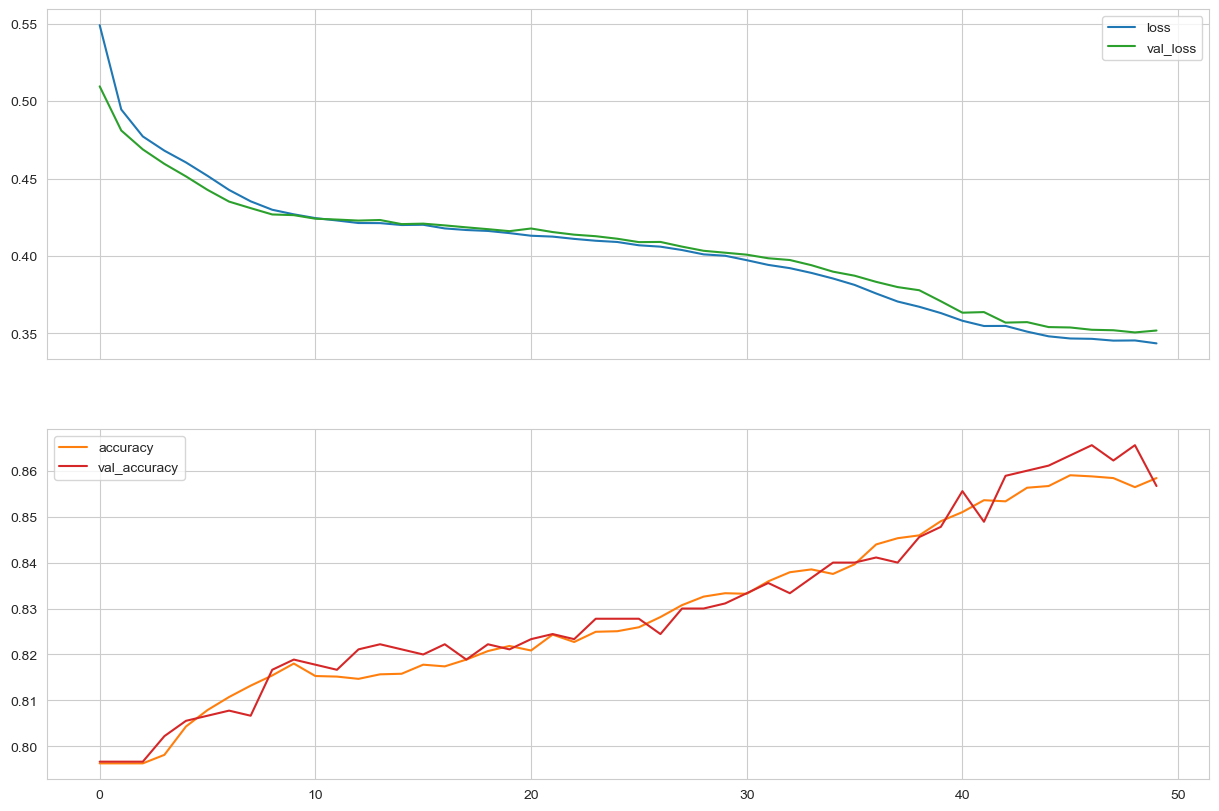

In [36]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [37]:
model.evaluate(X_test, y_test, verbose=0)

[0.3425982892513275, 0.8550000190734863]

In [38]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3425982892513275
accuracy :  0.8550000190734863


In [39]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

32/32 [==============================] - 0s 1ms/step
[[749  47]
 [ 98 106]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.69      0.52      0.59       204

    accuracy                           0.85      1000
   macro avg       0.79      0.73      0.75      1000
weighted avg       0.85      0.85      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [40]:
from sklearn.utils import class_weight

In [41]:
# Calculate weights using sklearn
sklearn_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y=y_train)
sklearn_weights

array([0.62790698, 2.45454545])

In [42]:
# Transform array to dictionary
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [43]:
tf.keras.utils.set_random_seed(seed)


balanced_model = Sequential()

balanced_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
balanced_model.add(Dense(9, activation = "relu"))
balanced_model.add(Dense(4, activation = "relu"))
balanced_model.add(Dense(1, activation = "sigmoid"))


balanced_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [44]:
balanced_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                234       
                                                                 
 dense_5 (Dense)             (None, 9)                 171       
                                                                 
 dense_6 (Dense)             (None, 4)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [45]:
balanced_model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(12, 18) dtype=float32, numpy=
 array([[ 0.15185279,  0.4186973 ,  0.41358918, -0.12065384, -0.41840667,
          0.3590138 , -0.05483547, -0.4091985 ,  0.08905238, -0.01452592,
         -0.30435988, -0.42909306,  0.3126176 ,  0.17383927, -0.3350221 ,
         -0.19937404,  0.04935849,  0.1825915 ],
        [-0.03423601,  0.09814125, -0.10778111,  0.23554802, -0.24629213,
         -0.22107938,  0.41756356,  0.14156121, -0.1592013 ,  0.26533538,
         -0.12546983,  0.27020407, -0.4134418 ,  0.2933824 , -0.31980163,
          0.3058324 ,  0.40091902, -0.15400124],
        [-0.12882474, -0.01632297,  0.43968529, -0.17402929,  0.2619378 ,
          0.3114261 , -0.10816059,  0.22112888, -0.2847869 , -0.01715699,
          0.3875308 , -0.22158489,  0.20664757, -0.40433294, -0.3934626 ,
          0.07160038, -0.39556876,  0.32856685],
        [ 0.41347486, -0.04002878, -0.30656624,  0.38581723, -0.37816802,
          0.12724417,  0.18501079,  0.00772

In [46]:
balanced_model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), # x_val, y_val that we assigned before as validation_data
          batch_size=128, 
          epochs=500,
          verbose=1, class_weight=sklearn_weights)


Epoch 1/500
64/64 [==============================] - 2s 5ms/step - loss: 0.6894 - recall: 0.4491 - val_loss: 0.6629 - val_recall: 0.5628
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6603 - recall: 0.6479 - val_loss: 0.6480 - val_recall: 0.6284
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6419 - recall: 0.6467 - val_loss: 0.6031 - val_recall: 0.5410
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6300 - recall: 0.6115 - val_loss: 0.6292 - val_recall: 0.6831
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6172 - recall: 0.6267 - val_loss: 0.5831 - val_recall: 0.6175
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6039 - recall: 0.6503 - val_loss: 0.5870 - val_recall: 0.6448
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5939 - recall: 0.6739 - val_loss: 0.5744 - val_recall: 0.6667
Epoch 8/500
64/64 [======================

64/64 [==============================] - 0s 4ms/step - loss: 0.4621 - recall: 0.7648 - val_loss: 0.4622 - val_recall: 0.7213
Epoch 61/500
64/64 [==============================] - 0s 4ms/step - loss: 0.4612 - recall: 0.7715 - val_loss: 0.4874 - val_recall: 0.7432
Epoch 62/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4616 - recall: 0.7752 - val_loss: 0.4557 - val_recall: 0.6940
Epoch 63/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4614 - recall: 0.7570 - val_loss: 0.4888 - val_recall: 0.7322
Epoch 64/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4602 - recall: 0.7812 - val_loss: 0.4477 - val_recall: 0.6885
Epoch 65/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4592 - recall: 0.7818 - val_loss: 0.4405 - val_recall: 0.6776
Epoch 66/500
64/64 [==============================] - 0s 4ms/step - loss: 0.4586 - recall: 0.7721 - val_loss: 0.4683 - val_recall: 0.7104
Epoch 67/500
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4473 - recall: 0.7812 - val_loss: 0.4606 - val_recall: 0.7213
Epoch 120/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4489 - recall: 0.7776 - val_loss: 0.4552 - val_recall: 0.7049
Epoch 121/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4485 - recall: 0.7745 - val_loss: 0.4338 - val_recall: 0.6885
Epoch 122/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4475 - recall: 0.7770 - val_loss: 0.4635 - val_recall: 0.7213
Epoch 123/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4473 - recall: 0.7794 - val_loss: 0.4463 - val_recall: 0.7049
Epoch 124/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4515 - recall: 0.7715 - val_loss: 0.4698 - val_recall: 0.7268
Epoch 125/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4480 - recall: 0.7758 - val_loss: 0.4707 - val_recall: 0.7322
Epoch 126/500
64/64 [====================

64/64 [==============================] - 0s 6ms/step - loss: 0.4424 - recall: 0.7782 - val_loss: 0.4280 - val_recall: 0.6940
Epoch 179/500
64/64 [==============================] - 0s 6ms/step - loss: 0.4428 - recall: 0.7752 - val_loss: 0.4517 - val_recall: 0.7049
Epoch 180/500
64/64 [==============================] - 0s 6ms/step - loss: 0.4431 - recall: 0.7758 - val_loss: 0.4614 - val_recall: 0.7213
Epoch 181/500
64/64 [==============================] - 0s 5ms/step - loss: 0.4433 - recall: 0.7758 - val_loss: 0.4673 - val_recall: 0.7158
Epoch 182/500
64/64 [==============================] - 0s 4ms/step - loss: 0.4438 - recall: 0.7855 - val_loss: 0.4308 - val_recall: 0.6940
Epoch 183/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4469 - recall: 0.7764 - val_loss: 0.4519 - val_recall: 0.7213
Epoch 184/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4431 - recall: 0.7745 - val_loss: 0.5019 - val_recall: 0.7596
Epoch 185/500
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4400 - recall: 0.7879 - val_loss: 0.4608 - val_recall: 0.7213
Epoch 238/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4405 - recall: 0.7897 - val_loss: 0.4728 - val_recall: 0.7322
Epoch 239/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4428 - recall: 0.7818 - val_loss: 0.4308 - val_recall: 0.6995
Epoch 240/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4395 - recall: 0.7830 - val_loss: 0.4692 - val_recall: 0.7268
Epoch 241/500
64/64 [==============================] - 0s 5ms/step - loss: 0.4406 - recall: 0.7830 - val_loss: 0.5198 - val_recall: 0.7705
Epoch 242/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4410 - recall: 0.7873 - val_loss: 0.4537 - val_recall: 0.7268
Epoch 243/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4408 - recall: 0.7855 - val_loss: 0.4216 - val_recall: 0.6995
Epoch 244/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4399 - recall: 0.7848 - val_loss: 0.4363 - val_recall: 0.7104
Epoch 297/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4370 - recall: 0.7830 - val_loss: 0.4569 - val_recall: 0.7268
Epoch 298/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4396 - recall: 0.7824 - val_loss: 0.4731 - val_recall: 0.7432
Epoch 299/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4380 - recall: 0.7915 - val_loss: 0.5313 - val_recall: 0.7923
Epoch 300/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4392 - recall: 0.7921 - val_loss: 0.4306 - val_recall: 0.6940
Epoch 301/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.7861 - val_loss: 0.4483 - val_recall: 0.7213
Epoch 302/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4369 - recall: 0.7879 - val_loss: 0.4438 - val_recall: 0.7104
Epoch 303/500
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4360 - recall: 0.7915 - val_loss: 0.4410 - val_recall: 0.7049
Epoch 356/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4365 - recall: 0.7933 - val_loss: 0.4499 - val_recall: 0.7268
Epoch 357/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4345 - recall: 0.7933 - val_loss: 0.4616 - val_recall: 0.7377
Epoch 358/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4356 - recall: 0.7939 - val_loss: 0.4582 - val_recall: 0.7322
Epoch 359/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4361 - recall: 0.7867 - val_loss: 0.4600 - val_recall: 0.7322
Epoch 360/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4366 - recall: 0.7788 - val_loss: 0.4324 - val_recall: 0.7158
Epoch 361/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4386 - recall: 0.7970 - val_loss: 0.4276 - val_recall: 0.6995
Epoch 362/500
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4347 - recall: 0.7909 - val_loss: 0.4108 - val_recall: 0.6940
Epoch 415/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4340 - recall: 0.7952 - val_loss: 0.4472 - val_recall: 0.7268
Epoch 416/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4343 - recall: 0.7921 - val_loss: 0.4578 - val_recall: 0.7268
Epoch 417/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4337 - recall: 0.7927 - val_loss: 0.4638 - val_recall: 0.7322
Epoch 418/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4352 - recall: 0.7909 - val_loss: 0.4299 - val_recall: 0.7049
Epoch 419/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4343 - recall: 0.7952 - val_loss: 0.4753 - val_recall: 0.7486
Epoch 420/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4343 - recall: 0.7939 - val_loss: 0.4169 - val_recall: 0.6885
Epoch 421/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4325 - recall: 0.7976 - val_loss: 0.4345 - val_recall: 0.7104
Epoch 474/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4319 - recall: 0.7970 - val_loss: 0.4384 - val_recall: 0.7104
Epoch 475/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4328 - recall: 0.7909 - val_loss: 0.4612 - val_recall: 0.7268
Epoch 476/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4319 - recall: 0.7970 - val_loss: 0.4673 - val_recall: 0.7432
Epoch 477/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4329 - recall: 0.7879 - val_loss: 0.4569 - val_recall: 0.7268
Epoch 478/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4332 - recall: 0.8012 - val_loss: 0.4728 - val_recall: 0.7322
Epoch 479/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4322 - recall: 0.7939 - val_loss: 0.4868 - val_recall: 0.7432
Epoch 480/500
64/64 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [47]:
loss_df_balanced = pd.DataFrame(balanced_model.history.history)

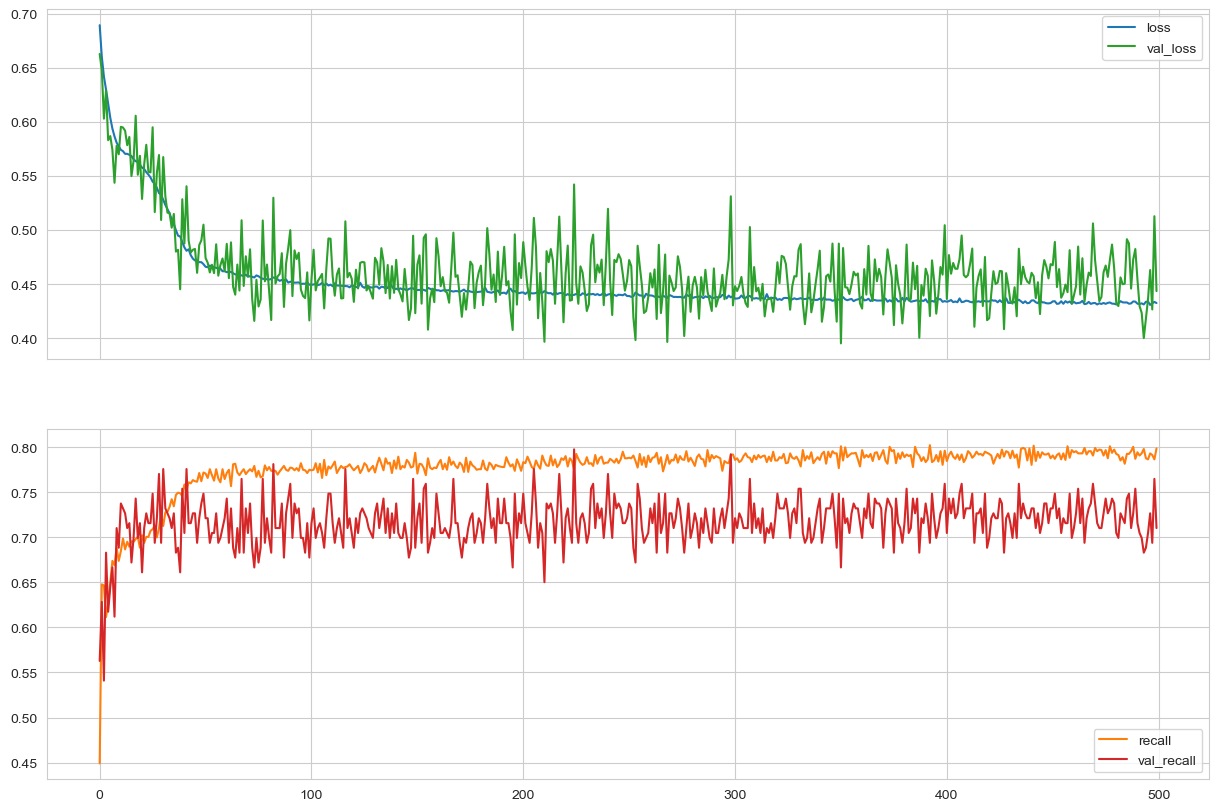

In [48]:
loss_df_balanced.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [49]:
y_pred = balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 975us/step
[[640 156]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       796
           1       0.51      0.78      0.62       204

    accuracy                           0.80      1000
   macro avg       0.72      0.79      0.74      1000
weighted avg       0.85      0.80      0.81      1000



32/32 [==============================] - 0s 1ms/step


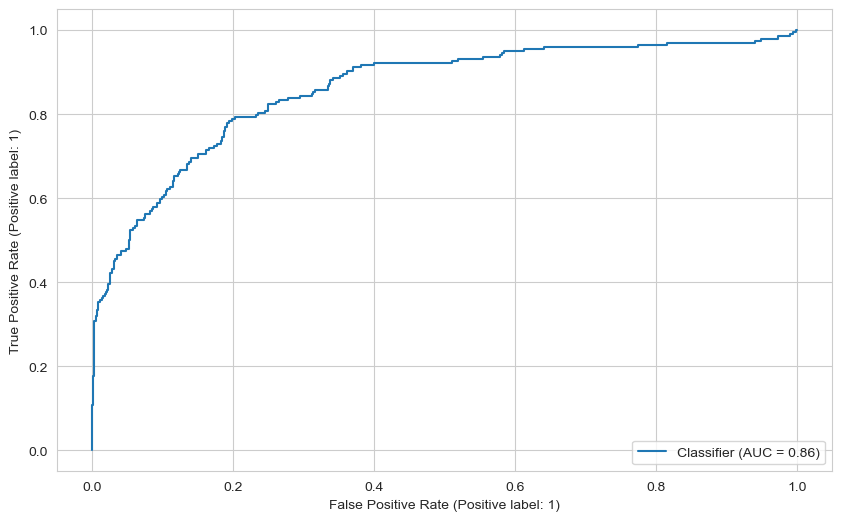

In [50]:
y_pred_proba = balanced_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [51]:
roc_auc_score(y_test, y_pred_proba)

0.8597460340920289

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [52]:
from tensorflow.keras.optimizers import Adam

In [53]:
tf.keras.utils.set_random_seed(seed)


lr_balanced_model = Sequential()

lr_balanced_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
lr_balanced_model.add(Dense(9, activation = "relu"))
lr_balanced_model.add(Dense(4, activation = "relu"))
lr_balanced_model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

lr_balanced_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [54]:
lr_balanced_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1
)

Epoch 1/250
64/64 [==============================] - 1s 7ms/step - loss: 0.5015 - recall: 6.0606e-04 - val_loss: 0.4636 - val_recall: 0.0109
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4611 - recall: 0.0612 - val_loss: 0.4412 - val_recall: 0.0765
Epoch 3/250
64/64 [==============================] - 0s 4ms/step - loss: 0.4392 - recall: 0.1485 - val_loss: 0.4331 - val_recall: 0.0929
Epoch 4/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4305 - recall: 0.2067 - val_loss: 0.4307 - val_recall: 0.3279
Epoch 5/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4225 - recall: 0.2515 - val_loss: 0.4260 - val_recall: 0.1749
Epoch 6/250
64/64 [==============================] - 0s 4ms/step - loss: 0.4168 - recall: 0.2673 - val_loss: 0.4227 - val_recall: 0.1913
Epoch 7/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4136 - recall: 0.2739 - val_loss: 0.4204 - val_recall: 0.2186
Epoch 8/250
64/64 [==================

64/64 [==============================] - 0s 2ms/step - loss: 0.3244 - recall: 0.4848 - val_loss: 0.3438 - val_recall: 0.4481
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3238 - recall: 0.4921 - val_loss: 0.3430 - val_recall: 0.4973
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3216 - recall: 0.4921 - val_loss: 0.3419 - val_recall: 0.4153
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3222 - recall: 0.4945 - val_loss: 0.3514 - val_recall: 0.4754
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3204 - recall: 0.4909 - val_loss: 0.3430 - val_recall: 0.4973
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3225 - recall: 0.4958 - val_loss: 0.3398 - val_recall: 0.4044
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3206 - recall: 0.5000 - val_loss: 0.3388 - val_recall: 0.5027
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 3ms/step - loss: 0.3152 - recall: 0.4964 - val_loss: 0.3437 - val_recall: 0.5301
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3129 - recall: 0.5091 - val_loss: 0.3396 - val_recall: 0.4426
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3166 - recall: 0.5036 - val_loss: 0.3431 - val_recall: 0.4590
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3144 - recall: 0.5097 - val_loss: 0.3415 - val_recall: 0.4536
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3114 - recall: 0.5103 - val_loss: 0.3396 - val_recall: 0.4536
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3124 - recall: 0.4952 - val_loss: 0.3522 - val_recall: 0.5355
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3128 - recall: 0.5097 - val_loss: 0.3586 - val_recall: 0.5410
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3052 - recall: 0.5145 - val_loss: 0.3518 - val_recall: 0.4590
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3076 - recall: 0.5212 - val_loss: 0.3451 - val_recall: 0.4918
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3062 - recall: 0.5164 - val_loss: 0.3371 - val_recall: 0.4372
Epoch 181/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3037 - recall: 0.5230 - val_loss: 0.3585 - val_recall: 0.4918
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3065 - recall: 0.5152 - val_loss: 0.3448 - val_recall: 0.4645
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3120 - recall: 0.5121 - val_loss: 0.3437 - val_recall: 0.4372
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3040 - recall: 0.5315 - val_loss: 0.3519 - val_recall: 0.5410
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3015 - recall: 0.5224 - val_loss: 0.3598 - val_recall: 0.4481
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3000 - recall: 0.5279 - val_loss: 0.3500 - val_recall: 0.4372
Epoch 239/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3042 - recall: 0.5279 - val_loss: 0.3584 - val_recall: 0.4863
Epoch 240/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3011 - recall: 0.5255 - val_loss: 0.3593 - val_recall: 0.4426
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3032 - recall: 0.5339 - val_loss: 0.3453 - val_recall: 0.4262
Epoch 242/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3036 - recall: 0.5230 - val_loss: 0.3535 - val_recall: 0.4645
Epoch 243/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3028 - recall: 0.5279 - val_loss: 0.3585 - val_recall: 0.4262
Epoch 244/250
64/64 [====================

**Evaluate model**

In [55]:
loss_lr_balanced = pd.DataFrame(lr_balanced_model.history.history)

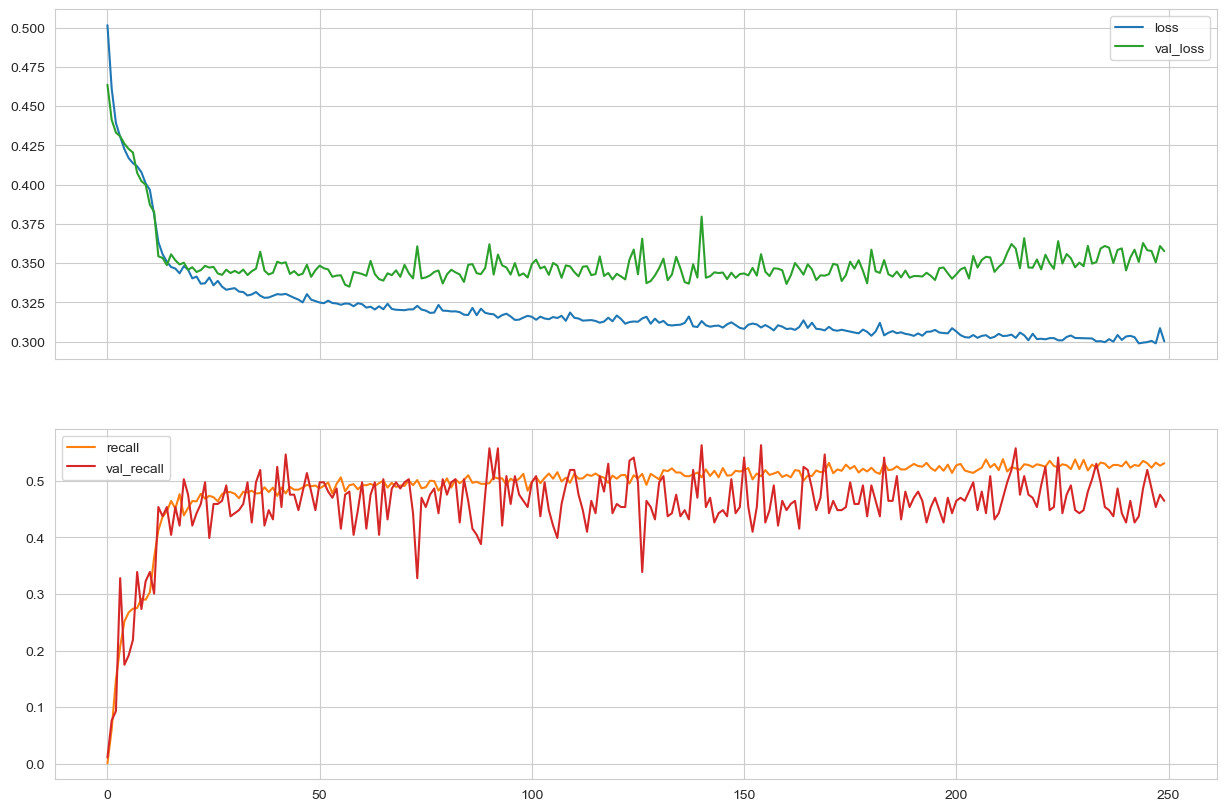

In [56]:
loss_lr_balanced.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [57]:
y_pred = lr_balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[744  52]
 [ 99 105]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       796
           1       0.67      0.51      0.58       204

    accuracy                           0.85      1000
   macro avg       0.78      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Add Dropout Layer

In [58]:
from tensorflow.keras.layers import Dropout

In [59]:
tf.keras.utils.set_random_seed(seed)

drop_model = Sequential()

drop_model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(9, activation="relu"))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(4, activation="relu"))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(1, activation="sigmoid"))


drop_model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [60]:
drop_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1  
)

Epoch 1/250
64/64 [==============================] - 2s 6ms/step - loss: 0.5951 - recall: 0.1048 - val_loss: 0.5232 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5647 - recall: 0.0236 - val_loss: 0.5121 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5487 - recall: 0.0121 - val_loss: 0.5001 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5381 - recall: 0.0055 - val_loss: 0.4941 - val_recall: 0.0000e+00
Epoch 5/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5307 - recall: 0.0055 - val_loss: 0.4909 - val_recall: 0.0000e+00
Epoch 6/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5280 - recall: 0.0067 - val_loss: 0.4868 - val_recall: 0.0000e+00
Epoch 7/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5198 - recall: 0.0042 - val_loss: 0.4829 - val_recall: 0.0000e+00
Epoch 8/250
6

Epoch 60/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4022 - recall: 0.3115 - val_loss: 0.3682 - val_recall: 0.3770
Epoch 61/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3986 - recall: 0.3400 - val_loss: 0.3701 - val_recall: 0.3716
Epoch 62/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3983 - recall: 0.3091 - val_loss: 0.3661 - val_recall: 0.4262
Epoch 63/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3991 - recall: 0.3200 - val_loss: 0.3669 - val_recall: 0.3770
Epoch 64/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4006 - recall: 0.3236 - val_loss: 0.3669 - val_recall: 0.3880
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3965 - recall: 0.3176 - val_loss: 0.3654 - val_recall: 0.3989
Epoch 66/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4031 - recall: 0.3115 - val_loss: 0.3654 - val_recall: 0.3880
Epoch 67/250
64/64 [==============

64/64 [==============================] - 0s 2ms/step - loss: 0.3779 - recall: 0.3612 - val_loss: 0.3544 - val_recall: 0.3880
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3845 - recall: 0.3521 - val_loss: 0.3543 - val_recall: 0.3934
Epoch 121/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3828 - recall: 0.3539 - val_loss: 0.3551 - val_recall: 0.3825
Epoch 122/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3914 - recall: 0.3491 - val_loss: 0.3548 - val_recall: 0.4098
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3840 - recall: 0.3461 - val_loss: 0.3542 - val_recall: 0.3825
Epoch 124/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3812 - recall: 0.3448 - val_loss: 0.3527 - val_recall: 0.3934
Epoch 125/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3796 - recall: 0.3697 - val_loss: 0.3536 - val_recall: 0.3825
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3773 - recall: 0.3685 - val_loss: 0.3470 - val_recall: 0.4153
Epoch 179/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3820 - recall: 0.3576 - val_loss: 0.3547 - val_recall: 0.3661
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3789 - recall: 0.3709 - val_loss: 0.3485 - val_recall: 0.4208
Epoch 181/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3778 - recall: 0.3618 - val_loss: 0.3487 - val_recall: 0.4262
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3792 - recall: 0.3642 - val_loss: 0.3478 - val_recall: 0.4098
Epoch 183/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3800 - recall: 0.3685 - val_loss: 0.3468 - val_recall: 0.4317
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3775 - recall: 0.3879 - val_loss: 0.3493 - val_recall: 0.4044
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3742 - recall: 0.3673 - val_loss: 0.3487 - val_recall: 0.3934
Epoch 238/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3805 - recall: 0.3648 - val_loss: 0.3493 - val_recall: 0.4044
Epoch 239/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3794 - recall: 0.3491 - val_loss: 0.3489 - val_recall: 0.4481
Epoch 240/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3721 - recall: 0.3721 - val_loss: 0.3465 - val_recall: 0.4372
Epoch 241/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3759 - recall: 0.3758 - val_loss: 0.3468 - val_recall: 0.4372
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3701 - recall: 0.3727 - val_loss: 0.3472 - val_recall: 0.4372
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3717 - recall: 0.4048 - val_loss: 0.3483 - val_recall: 0.4044
Epoch 244/250
64/64 [====================

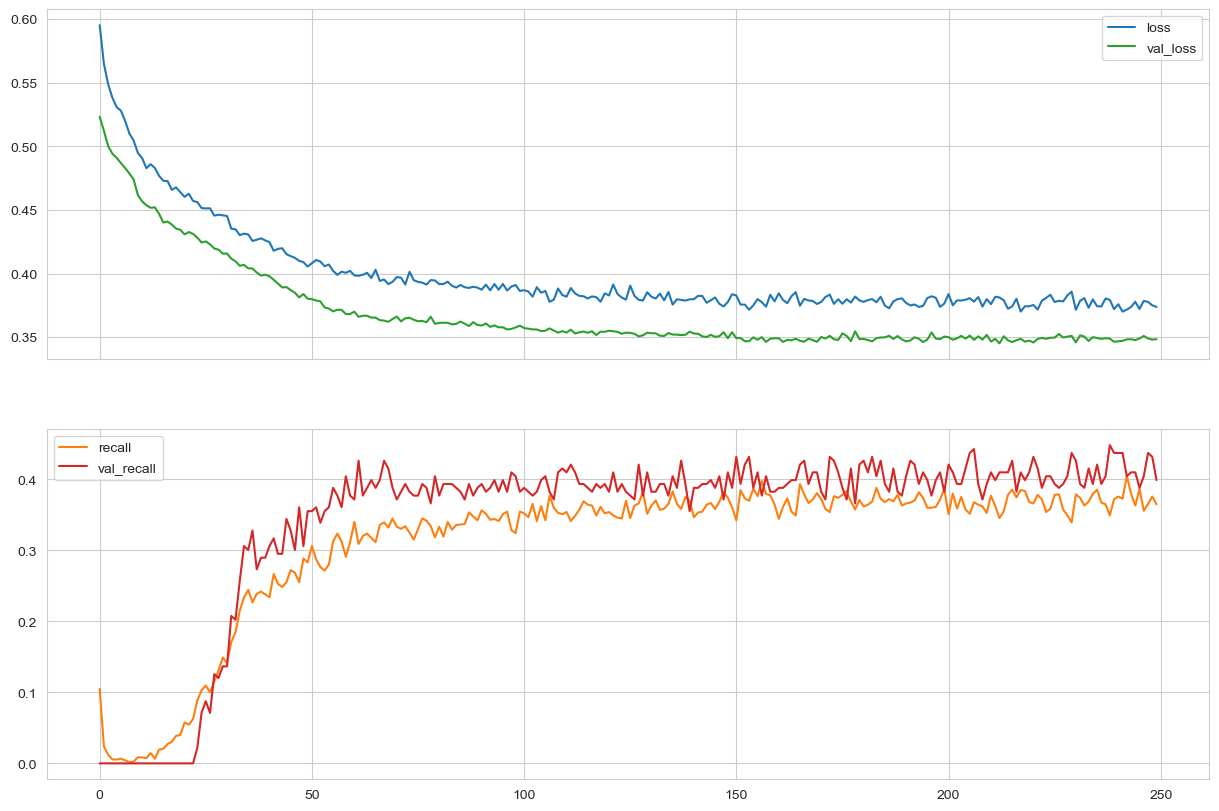

In [61]:
loss_df = pd.DataFrame(drop_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [62]:
y_pred = drop_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 874us/step
[[766  30]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.43      0.54       204

    accuracy                           0.85      1000
   macro avg       0.81      0.69      0.73      1000
weighted avg       0.84      0.85      0.84      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
tf.keras.utils.set_random_seed(seed)

early_model = Sequential()

early_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
early_model.add(Dense(9, activation = "relu"))
early_model.add(Dense(4, activation = "relu"))
early_model.add(Dense(1, activation = "sigmoid"))

early_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [65]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)


In [66]:
early_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.5492 - recall: 0.0000e+00 - val_loss: 0.5096 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4947 - recall: 0.0000e+00 - val_loss: 0.4811 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4773 - recall: 0.0000e+00 - val_loss: 0.4689 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4681 - recall: 0.0121 - val_loss: 0.4595 - val_recall: 0.0328
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4605 - recall: 0.0552 - val_loss: 0.4515 - val_recall: 0.0601
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4518 - recall: 0.0982 - val_loss: 0.4427 - val_recall: 0.0765
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4427 - recall: 0.1018 - val_loss: 0.4352 - val_recall: 0.0929
Epoch 8/250
64/64

64/64 [==============================] - 0s 3ms/step - loss: 0.3401 - recall: 0.4539 - val_loss: 0.3490 - val_recall: 0.4590
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3389 - recall: 0.4624 - val_loss: 0.3482 - val_recall: 0.4699
Epoch 62/250
64/64 [==============================] - 0s 5ms/step - loss: 0.3387 - recall: 0.4715 - val_loss: 0.3489 - val_recall: 0.4372
Epoch 63/250
64/64 [==============================] - 0s 4ms/step - loss: 0.3394 - recall: 0.4570 - val_loss: 0.3504 - val_recall: 0.4918
Epoch 64/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3383 - recall: 0.4648 - val_loss: 0.3491 - val_recall: 0.4426
Epoch 65/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3382 - recall: 0.4752 - val_loss: 0.3496 - val_recall: 0.4372
Epoch 66/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3372 - recall: 0.4600 - val_loss: 0.3472 - val_recall: 0.4536
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3304 - recall: 0.4818 - val_loss: 0.3456 - val_recall: 0.4863
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3310 - recall: 0.4952 - val_loss: 0.3448 - val_recall: 0.4645
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3314 - recall: 0.4921 - val_loss: 0.3455 - val_recall: 0.4317
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3305 - recall: 0.4824 - val_loss: 0.3452 - val_recall: 0.4754
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3298 - recall: 0.4921 - val_loss: 0.3453 - val_recall: 0.4699
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3316 - recall: 0.4770 - val_loss: 0.3461 - val_recall: 0.4918
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3308 - recall: 0.4903 - val_loss: 0.3446 - val_recall: 0.4863
Epoch 126/250
64/64 [====================

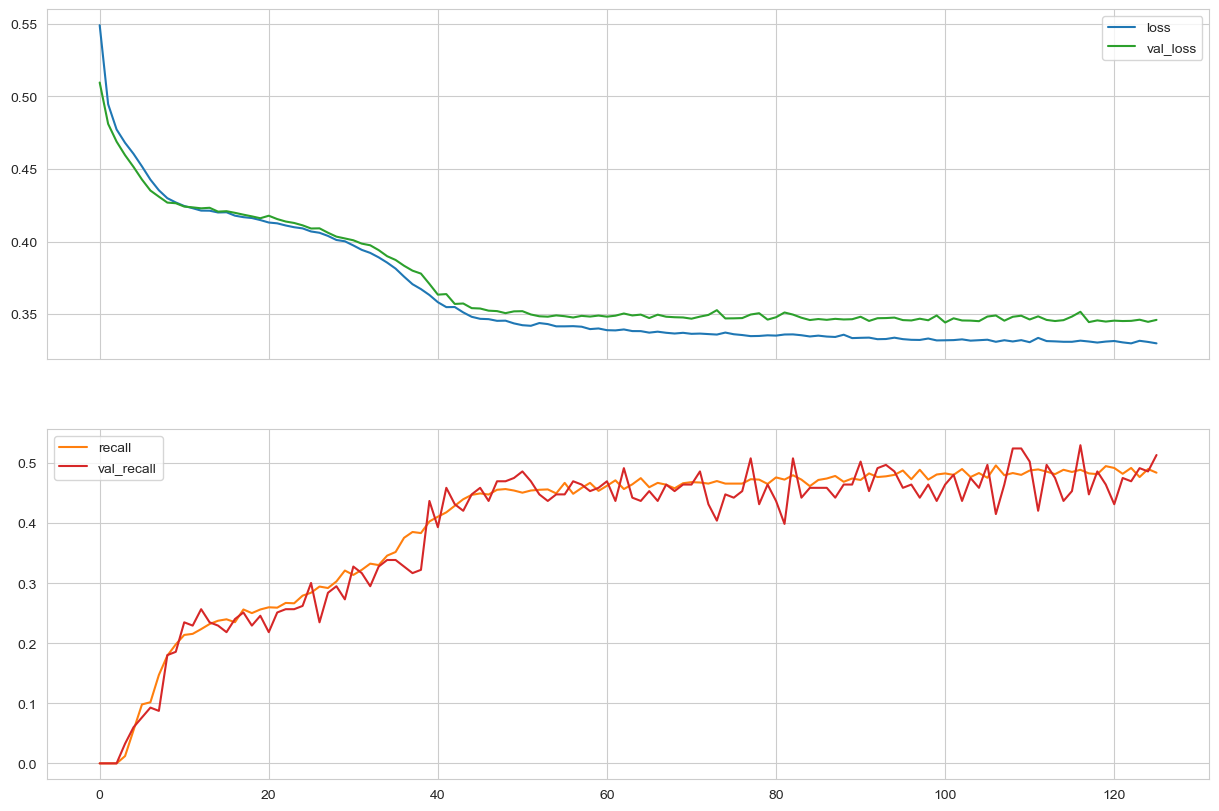

In [67]:
loss_df = pd.DataFrame(early_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [68]:
y_pred = early_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 942us/step
[[757  39]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.50      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



#### Monitor the "val_recall" as metric

In [69]:
tf.keras.utils.set_random_seed(seed)

early_model = Sequential()

early_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
early_model.add(Dense(9, activation = "relu"))
early_model.add(Dense(4, activation = "relu"))
early_model.add(Dense(1, activation = "sigmoid"))

early_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [70]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 50, restore_best_weights = True)

In [71]:
early_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.5492 - recall: 0.0000e+00 - val_loss: 0.5096 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4947 - recall: 0.0000e+00 - val_loss: 0.4811 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4773 - recall: 0.0000e+00 - val_loss: 0.4689 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4681 - recall: 0.0121 - val_loss: 0.4595 - val_recall: 0.0328
Epoch 5/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4605 - recall: 0.0552 - val_loss: 0.4515 - val_recall: 0.0601
Epoch 6/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4518 - recall: 0.0982 - val_loss: 0.4427 - val_recall: 0.0765
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4427 - recall: 0.1018 - val_loss: 0.4352 - val_recall: 0.0929
Epoch 8/250
64/64

64/64 [==============================] - 0s 2ms/step - loss: 0.3401 - recall: 0.4539 - val_loss: 0.3490 - val_recall: 0.4590
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3389 - recall: 0.4624 - val_loss: 0.3482 - val_recall: 0.4699
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3387 - recall: 0.4715 - val_loss: 0.3489 - val_recall: 0.4372
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3394 - recall: 0.4570 - val_loss: 0.3504 - val_recall: 0.4918
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3383 - recall: 0.4648 - val_loss: 0.3491 - val_recall: 0.4426
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3382 - recall: 0.4752 - val_loss: 0.3496 - val_recall: 0.4372
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3372 - recall: 0.4600 - val_loss: 0.3472 - val_recall: 0.4536
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3304 - recall: 0.4818 - val_loss: 0.3456 - val_recall: 0.4863
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3310 - recall: 0.4952 - val_loss: 0.3448 - val_recall: 0.4645
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3314 - recall: 0.4921 - val_loss: 0.3455 - val_recall: 0.4317
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3305 - recall: 0.4824 - val_loss: 0.3452 - val_recall: 0.4754
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3298 - recall: 0.4921 - val_loss: 0.3453 - val_recall: 0.4699
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3316 - recall: 0.4770 - val_loss: 0.3461 - val_recall: 0.4918
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3308 - recall: 0.4903 - val_loss: 0.3446 - val_recall: 0.4863
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3265 - recall: 0.4964 - val_loss: 0.3455 - val_recall: 0.4645
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3267 - recall: 0.4891 - val_loss: 0.3463 - val_recall: 0.4754
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3266 - recall: 0.4964 - val_loss: 0.3453 - val_recall: 0.4536
Epoch 181/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3273 - recall: 0.4939 - val_loss: 0.3473 - val_recall: 0.4918
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3270 - recall: 0.5036 - val_loss: 0.3456 - val_recall: 0.4645
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3295 - recall: 0.4824 - val_loss: 0.3460 - val_recall: 0.4863
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3268 - recall: 0.4952 - val_loss: 0.3471 - val_recall: 0.4973
Epoch 185/250
64/64 [====================

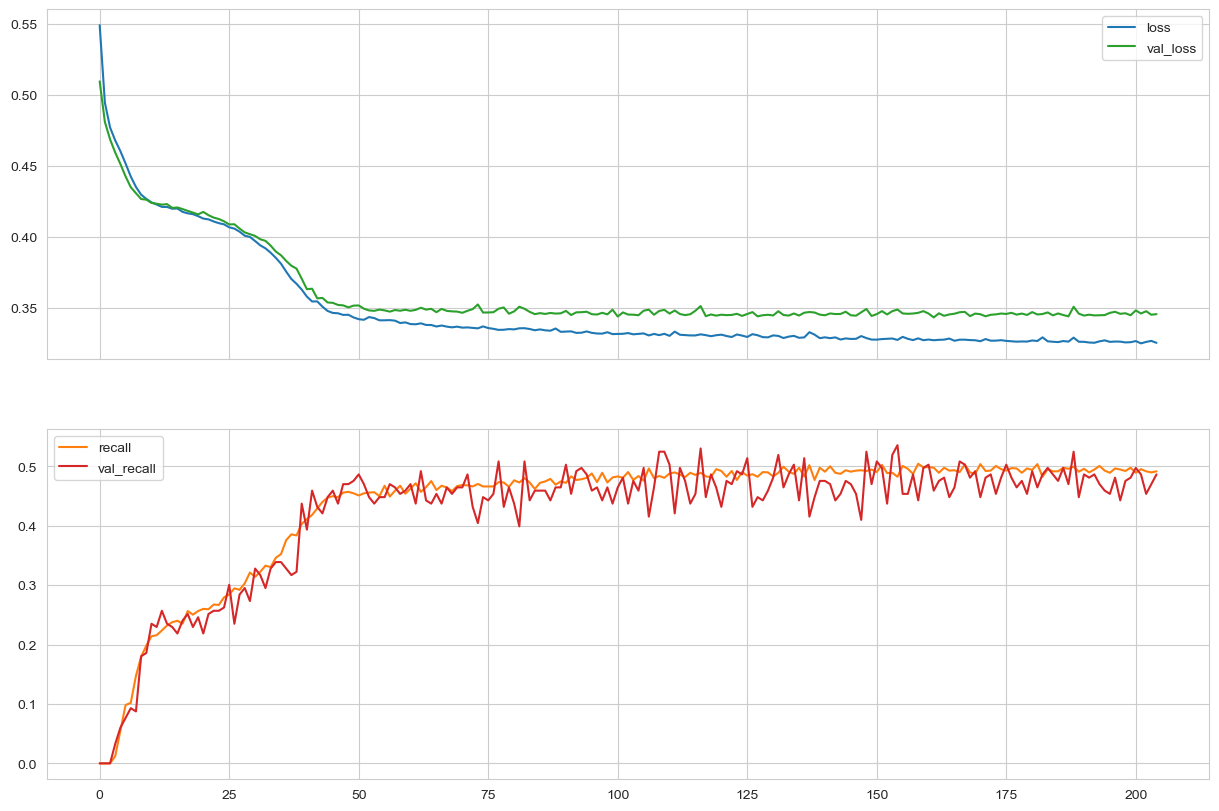

In [72]:
loss_df = pd.DataFrame(early_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [73]:
y_pred = early_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[740  56]
 [ 85 119]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       796
           1       0.68      0.58      0.63       204

    accuracy                           0.86      1000
   macro avg       0.79      0.76      0.77      1000
weighted avg       0.85      0.86      0.85      1000



## Optuna

In [74]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [75]:
import optuna

In [76]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [77]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [78]:
trial_metric = "Recall"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 18, 36) 
    n_units2 = trial.suggest_int("n_units2", 18, 36)  
    n_units3 = trial.suggest_int("n_units3", 18, 36)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   


    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 2) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 5) # daha var, bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[early_stop],
        class_weight={0 :w0, 1:w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > 0.85: # herhangi bir classin skorlari kotu geldiginde bu threshold artirilabilip azaltilabilir
        score = score * 0
    return score

In [79]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-18 00:40:22,629] A new study created in memory with name: no-name-5f023bcd-39fa-420f-954b-dd2b5728e431


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-18 00:40:29,133] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 34, 'n_units2': 19, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0001266494967910942, 'regularizer1': 0.00013942277823048745, 'regularizer2': 0.00030421606412291114, 'dropout': 0.5, 'w0': 0.21485128429999414, 'w1': 0.03838837155454953}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-18 00:40:34,022] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 34, 'n_units2': 31, 'n_units3': 21, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0552817659693449, 'regularizer1': 0.0002838707107396212, 'regularizer2': 5.3323353015118145e-05, 'dropout': 0, 'w0': 0.213912125499358, 'w1': 3.9419965890171746}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 22.
Epoch 47: early stopping


[I 2023-05-18 00:40:43,462] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 25, 'n_units2': 25, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.05282993568481279, 'regularizer1': 0.00042126045014183496, 'regularizer2': 1.0920331826683683e-05, 'dropout': 0.3, 'w0': 0.03040379815332988, 'w1': 0.14448732095813574}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-18 00:40:49,321] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 18, 'n_units2': 35, 'n_units3': 35, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.05153120548574638, 'regularizer1': 9.554779893727743e-05, 'regularizer2': 1.5266899759643354e-05, 'dropout': 0.3, 'w0': 0.034029386300388896, 'w1': 1.806798802914486}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 13.
Epoch 38: early stopping


[I 2023-05-18 00:41:00,075] Trial 4 finished with value: 0.3970588147640228 and parameters: {'n_units1': 36, 'n_units2': 35, 'n_units3': 31, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.01306091486507644, 'regularizer1': 0.0006429738382370562, 'regularizer2': 0.00013724058237105143, 'dropout': 0.3, 'w0': 0.03617409919372002, 'w1': 0.022884536111129002}. Best is trial 4 with value: 0.3970588147640228.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-18 00:41:05,999] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 18, 'n_units2': 29, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.019363876693074586, 'regularizer1': 4.85711749934636e-05, 'regularizer2': 2.127199867424227e-05, 'dropout': 0.3, 'w0': 1.7561134408041714, 'w1': 0.020685706104458062}. Best is trial 4 with value: 0.3970588147640228.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-18 00:41:11,354] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 23, 'n_units2': 30, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.003464487250391669, 'regularizer1': 1.086434553780692e-05, 'regularizer2': 1.4941037405740723e-05, 'dropout': 0.3, 'w0': 0.2748469186260994, 'w1': 0.0856110721082385}. Best is trial 4 with value: 0.3970588147640228.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-18 00:41:17,353] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 30, 'n_units2': 22, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0024222101890571564, 'regularizer1': 0.000650806674809465, 'regularizer2': 0.0001420141619559189, 'dropout': 0.5, 'w0': 0.4611260369522203, 'w1': 0.025562309926418877}. Best is trial 4 with value: 0.3970588147640228.


Restoring model weights from the end of the best epoch: 12.
Epoch 37: early stopping


[I 2023-05-18 00:41:25,047] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 32, 'n_units2': 22, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.04477097306986847, 'regularizer1': 4.149662791068626e-05, 'regularizer2': 1.6604223572814598e-05, 'dropout': 0.5, 'w0': 0.14785488778205794, 'w1': 1.3122241864938327}. Best is trial 4 with value: 0.3970588147640228.


Restoring model weights from the end of the best epoch: 41.
Epoch 66: early stopping


[I 2023-05-18 00:41:36,957] Trial 9 finished with value: 0.7058823704719543 and parameters: {'n_units1': 26, 'n_units2': 27, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 2.3318035438833674e-05, 'regularizer1': 0.0007979260969482955, 'regularizer2': 1.0193619028856695e-05, 'dropout': 0, 'w0': 0.03498852530438139, 'w1': 0.1575014628662118}. Best is trial 9 with value: 0.7058823704719543.


Restoring model weights from the end of the best epoch: 14.
Epoch 39: early stopping


[I 2023-05-18 00:41:43,548] Trial 10 finished with value: 0.0 and parameters: {'n_units1': 28, 'n_units2': 25, 'n_units3': 23, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.5968931707097067e-05, 'regularizer1': 0.0008388409109789948, 'regularizer2': 0.0009817838684708753, 'dropout': 0, 'w0': 0.014177801456929233, 'w1': 0.4442991299875486}. Best is trial 9 with value: 0.7058823704719543.


Restoring model weights from the end of the best epoch: 110.
Epoch 135: early stopping


[I 2023-05-18 00:42:04,373] Trial 11 finished with value: 0.27450981736183167 and parameters: {'n_units1': 23, 'n_units2': 36, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.00030963926624580606, 'regularizer1': 0.0009689316492976046, 'regularizer2': 6.437307159854854e-05, 'dropout': 0, 'w0': 0.05232611844116077, 'w1': 0.01132497407299067}. Best is trial 9 with value: 0.7058823704719543.


Restoring model weights from the end of the best epoch: 34.
Epoch 59: early stopping


[I 2023-05-18 00:42:15,338] Trial 12 finished with value: 0.0 and parameters: {'n_units1': 36, 'n_units2': 33, 'n_units3': 31, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.7919293776146546e-05, 'regularizer1': 0.0003413540734639812, 'regularizer2': 3.280544059684225e-05, 'dropout': 0, 'w0': 0.010840954900476022, 'w1': 0.07077492515941043}. Best is trial 9 with value: 0.7058823704719543.


Restoring model weights from the end of the best epoch: 10.
Epoch 35: early stopping


[I 2023-05-18 00:42:23,351] Trial 13 finished with value: 0.8186274766921997 and parameters: {'n_units1': 27, 'n_units2': 27, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.007306584350684393, 'regularizer1': 0.0009844787381664219, 'regularizer2': 0.00012991030346438031, 'dropout': 0.3, 'w0': 0.06578343937049773, 'w1': 0.24125061279276094}. Best is trial 13 with value: 0.8186274766921997.


Restoring model weights from the end of the best epoch: 42.
Epoch 67: early stopping


[I 2023-05-18 00:42:34,157] Trial 14 finished with value: 0.8284313678741455 and parameters: {'n_units1': 26, 'n_units2': 27, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005901560216716561, 'regularizer1': 0.0009843381424497453, 'regularizer2': 3.8983690814525466e-05, 'dropout': 0, 'w0': 0.08802405354061336, 'w1': 0.31258217770930935}. Best is trial 14 with value: 0.8284313678741455.


{'n_units1': 26,
 'n_units2': 27,
 'n_units3': 18,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 0.0005901560216716561,
 'regularizer1': 0.0009843381424497453,
 'regularizer2': 3.8983690814525466e-05,
 'dropout': 0,
 'w0': 0.08802405354061336,
 'w1': 0.31258217770930935}

In [80]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
opt_model = Sequential()
opt_model.add(Dense(unit1, 
                activation="relu" 
                ))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(unit2, 
                activation="relu"))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(unit3, 
                activation="relu"))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
opt_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
opt_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    callbacks=[early_stop],
    verbose=1, class_weight={0: w0, 1:w1})

Epoch 1/250
64/64 [==============================] - 2s 6ms/step - loss: 0.0943 - recall: 0.0667 - val_loss: 0.6264 - val_recall: 0.2623
Epoch 2/250
64/64 [==============================] - 0s 3ms/step - loss: 0.0899 - recall: 0.3024 - val_loss: 0.5930 - val_recall: 0.3825
Epoch 3/250
64/64 [==============================] - 0s 3ms/step - loss: 0.0873 - recall: 0.4436 - val_loss: 0.5685 - val_recall: 0.4973
Epoch 4/250
64/64 [==============================] - 0s 3ms/step - loss: 0.0851 - recall: 0.5448 - val_loss: 0.5913 - val_recall: 0.7049
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.0833 - recall: 0.6158 - val_loss: 0.5622 - val_recall: 0.6776
Epoch 6/250
64/64 [==============================] - 0s 3ms/step - loss: 0.0818 - recall: 0.6188 - val_loss: 0.5643 - val_recall: 0.6776
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.0805 - recall: 0.6406 - val_loss: 0.5430 - val_recall: 0.6503
Epoch 8/250
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.0597 - recall: 0.7630 - val_loss: 0.4229 - val_recall: 0.6995
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.0595 - recall: 0.7545 - val_loss: 0.4810 - val_recall: 0.7650
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.0596 - recall: 0.7642 - val_loss: 0.4128 - val_recall: 0.7049
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.0595 - recall: 0.7612 - val_loss: 0.4533 - val_recall: 0.7268
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.0594 - recall: 0.7624 - val_loss: 0.4252 - val_recall: 0.7158
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.0594 - recall: 0.7630 - val_loss: 0.4088 - val_recall: 0.7049
Epoch 66/250
64/64 [==============================] - 0s 3ms/step - loss: 0.0592 - recall: 0.7630 - val_loss: 0.4337 - val_recall: 0.7213
Epoch 67/250
64/64 [===========================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [81]:
history = opt_model.history.history

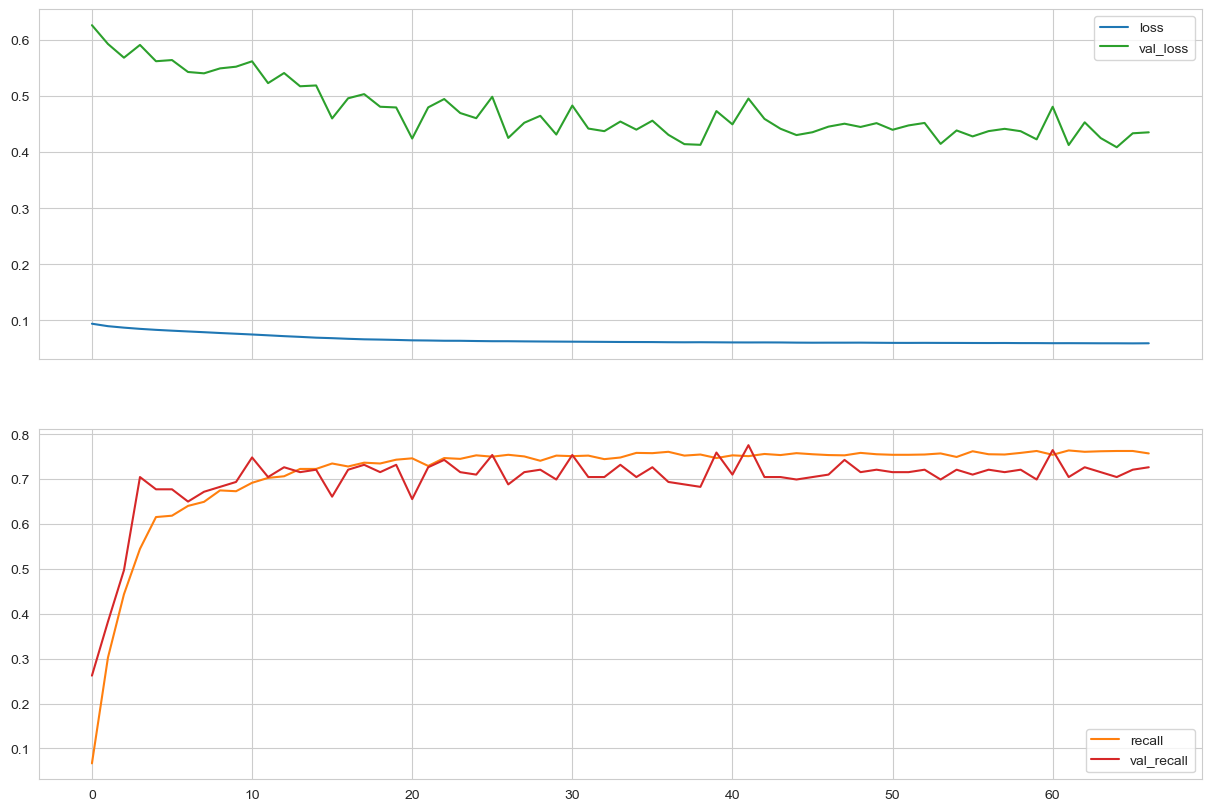

In [82]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [83]:
y_pred = (opt_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[587 209]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       796
           1       0.45      0.83      0.58       204

    accuracy                           0.76      1000
   macro avg       0.70      0.78      0.70      1000
weighted avg       0.84      0.76      0.78      1000



32/32 [==============================] - 0s 923us/step


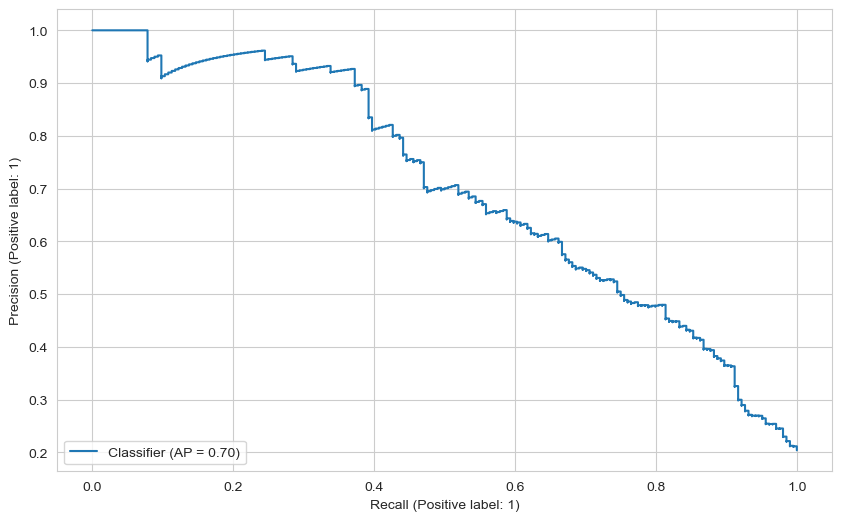

In [84]:
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve

y_pred_proba = opt_model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba);

# Final Model and Model Deployment

In [85]:
import pickle

pickle.dump(scaler, open("scaler_bank_churn", 'wb'))


In [86]:
y_pred = balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 961us/step
[[640 156]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       796
           1       0.51      0.78      0.62       204

    accuracy                           0.80      1000
   macro avg       0.72      0.79      0.74      1000
weighted avg       0.85      0.80      0.81      1000



In [87]:
balanced_model.save('model_bank_churn.h5')

## Prediction

In [88]:
# load model
from tensorflow.keras.models import load_model

In [89]:
model_churn = load_model('model_bank_churn.h5')

scaler_churn = pickle.load(open("scaler_bank_churn", "rb"))

In [90]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geog_germany,geog_spain,geog_france
0,619,1,42,2,0.000,1,1,1,101348.880,0,0,1


In [91]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[0.538     , 1.        , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50678999, 0.        ,
        0.        , 1.        ]])

In [92]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 62ms/step


array([[1]])

In [93]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [94]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, test_size=0.1, random_state=seed)

**Logistic regression**

In [95]:
from sklearn.linear_model import LogisticRegression

class_weights = {0: 1.0, 1: 10.0}  # Define class weights based on the imbalance

log_model = LogisticRegression(class_weight=sklearn_weights)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[527 269]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       796
           1       0.35      0.71      0.47       204

    accuracy                           0.67      1000
   macro avg       0.62      0.69      0.62      1000
weighted avg       0.79      0.67      0.70      1000



**Random Forest**

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf_model = RandomForestClassifier(class_weight=sklearn_weights)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[768  28]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.78      0.48      0.59       204

    accuracy                           0.87      1000
   macro avg       0.83      0.72      0.76      1000
weighted avg       0.86      0.87      0.85      1000



**Catboost**

In [98]:
from catboost import CatBoostClassifier

# Train the CatBoostClassifier model with early stopping
cat_model = CatBoostClassifier(iterations=1000, early_stopping_rounds=10, random_state=seed, class_weight=sklearn_weights,
                               learning_rate = 0.1, eval_metric='Recall', use_best_model=True)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Use the trained model to make predictions on the test set
y_pred = cat_model.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Use the trained model to make predictions on the test set
y_pred_train = cat_model.predict(X_train)

# Print the confusion matrix and classification report
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TypeError: CatBoostClassifier.__init__() got an unexpected keyword argument 'class_weight'

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___